Thresholds:  [2.   1.   0.8  0.4  0.35 0.1 ]
1.0
0.6666666666666667
0.33333333333333337
0.7453559924999299
0.6666666666666666
1.0
maxDistFPR:  0.0  maxDistTPR:  0.6666666666666666 Threshold:  0.8
equalFPR:  0.6666666666666666  equalTPR:  0.6666666666666666 Threshold:  0.4
closestFPR:  0.6666666666666666  closestTPR:  0.6666666666666666 Threshold:  0.4


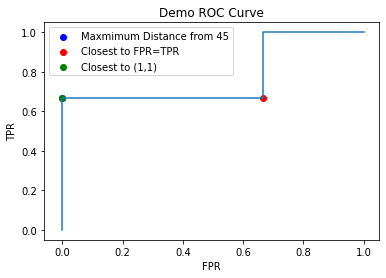

In [12]:
#AML 11/14/15
#testing setting up the true labels for the polyASite2.0 Datasets for the sklearn.metrics.roc_curve 

#testing roc_curve
import numpy as np
import sklearn as sk
from sklearn import metrics
import matplotlib.pyplot as plt
import math

y = np.array([1, 1, 2, 2,1,2])
scores = np.array([0.1, 0.4, 0.35, 0.8,0.6,1.0])
fpr, tpr, thresholds = sk.metrics.roc_curve(y, scores, pos_label=2)
#print ("FPR: ", fpr)
#print ("TPR: ", tpr)
print ("Thresholds: ", thresholds)

#functions for calculating the 3 most common threshold choosing techniques:
#1) Threshold w/max distance from the 45 degree line
#2) Threshold w/min distance to point where Sensitivity=Specificity
#3) Threshold w/min distance to (1,1)

def maxPosDist45DegreeLine(fpr,tpr, threshs):
    #fpr is x, tpr is y
    #find the fpr,tpr,and threshold of the ROC point with the maximum positive distance from the 45 degree line
    maxPosDist = -1
    maxIndex = 0
    for i in range(0,len(fpr)):
        if tpr[i] >=fpr[i]: #above or on the 45 degree line
            currPosDist = tpr[i] - fpr[i] #since 45 degree line is y=x
            if currPosDist >= maxPosDist:
                    maxPosDist = currPosDist 
                    maxIndex = i
    if maxPosDist == -1:
        return None
    else:
        return fpr[maxIndex], tpr[maxIndex], threshs[maxIndex]


def findSpecifictySensitivityEqualityPoint(fpr,tpr,threshs):
    #find the prediction closest to where sensitivity=specificity
    minDiff = math.sqrt(2) #maximum possible distance for the unit cube of the ROC curve
    minIndex = 0
    for i in range(0,len(fpr)):
        if fpr[i] != 0.0 and tpr[i] != 0.0: #will always choose (0,0) if not blocked from doing so
            se = tpr[i]
            sp = 1 - fpr[i]
            currDiff = math.fabs(se-sp)
            if currDiff < minDiff:
                minDiff = currDiff
                minIndex = i
    if minDiff != math.sqrt(2):
        return fpr[minIndex], tpr[minIndex], threshs[minIndex]
    
def minDistanceTopLeftCorner(fpr,tpr,threshs):
    #find the prediction closest to (1,1)
    minDist = math.sqrt(2) #maximum possible distance for the unit cube of the ROC curve
    minIndex = 0
    for i in range(0,len(fpr)):
        currDist = math.sqrt((fpr[i])**2 + (1-tpr[i])**2)
        print (currDist)
        if currDist < minDist:
            minDist = currDist
            minIndex = i
    if minDist != math.sqrt(2):
        return fpr[minIndex], tpr[minIndex], threshs[minIndex]
    
posDistFPR, posDistTPR, posDistThresh  = maxPosDist45DegreeLine(fpr,tpr,thresholds)
equalFPR, equalTPR, equalThresh  = findSpecifictySensitivityEqualityPoint(fpr,tpr,thresholds)
closeFPR, closeTPR, closeThresh  = minDistanceTopLeftCorner(fpr,tpr,thresholds)
print ("maxDistFPR: ", posDistFPR, " maxDistTPR: ", posDistTPR, "Threshold: ", posDistThresh)
print ("equalFPR: ", equalFPR, " equalTPR: ", equalTPR, "Threshold: ", equalThresh)
print ("closestFPR: ", equalFPR, " closestTPR: ", equalTPR, "Threshold: ", equalThresh)
plt.plot(fpr, tpr, )
plt.scatter(posDistFPR,posDistTPR, c = "blue",label = "Maxmimum Distance from 45")
plt.scatter(equalFPR,equalTPR, c = "red", label = "Closest to FPR=TPR")
plt.scatter(closeFPR, closeTPR, c = "green", label = "Closest to (1,1)")
plt.title("Demo ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

